In [ ]:
%%bash
# Extract raw data
tar -zxf ../raw_data/20181213.tar.gz -C ../raw_data

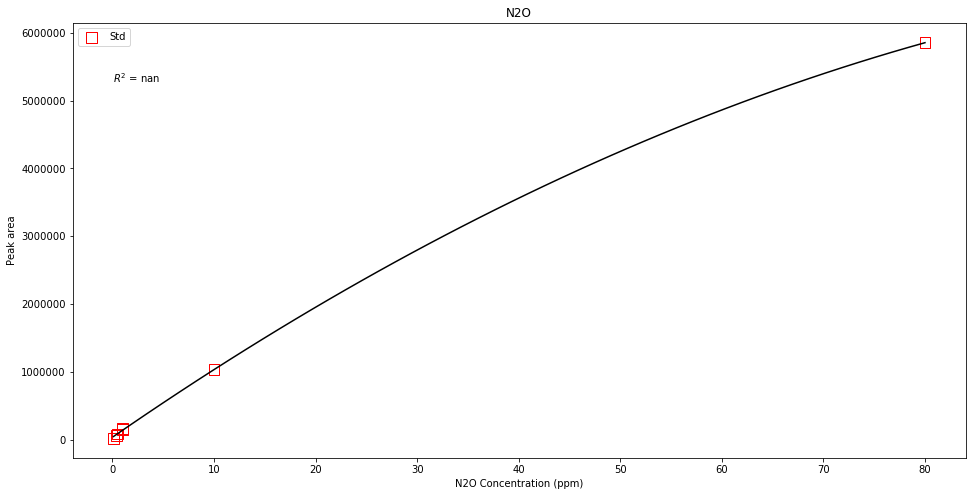

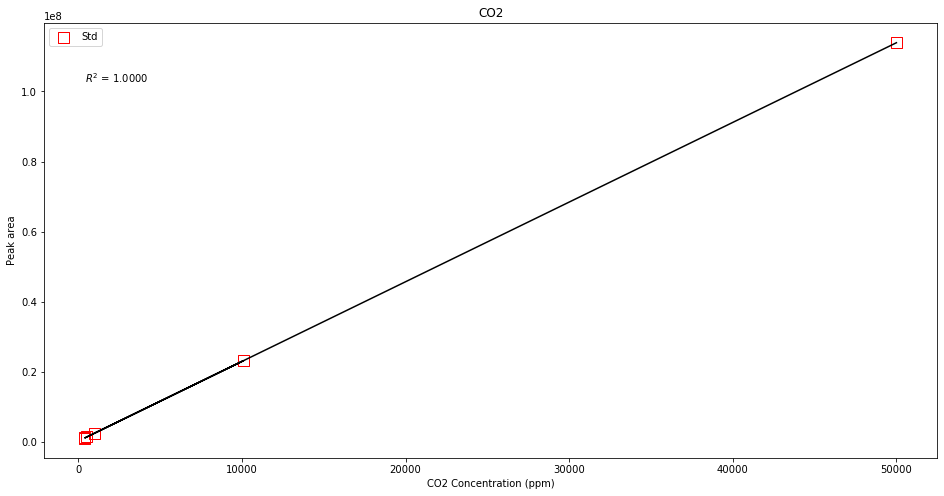

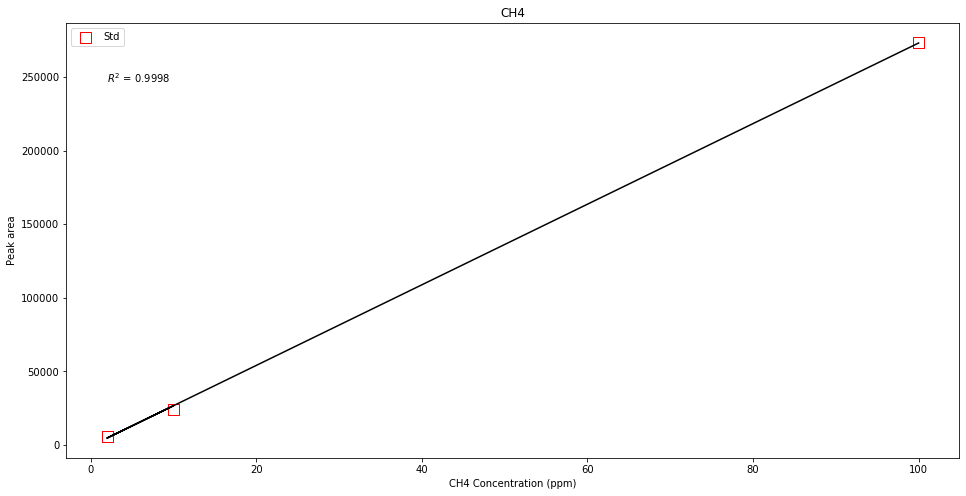

In [2]:
%matplotlib inline

# Import important packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# Import user-defined module with regression and plotting functions
from src.calibrate import *

# Import the csv data as a dataframe
df = pd.read_csv("../raw_data/20181213/GC_run_20181213.csv")
N2Ostd  = df[df['Sample_name'].str.contains("N2OStd")].copy()
CO2std  = df[df['Sample_name'].str.contains("CO2Std")].copy()
CH4std  = df[df['Sample_name'].str.contains("CH4Std")].copy()
samples = df[df['Sample_name'].str.contains("NT")].copy()

# Convert the data types to numeric
CO2std_x = CO2std.loc[:,"CO2_conc"].astype(float)
CO2std_y = CO2std.loc[:,"CO2_peak"].astype(float)
N2Ostd_x = N2Ostd.loc[:,"N2O_conc"].astype(float)
N2Ostd_y = N2Ostd.loc[:,"N2O_peak"].astype(float)
CH4std_x = CH4std.loc[:,"CH4_conc"].astype(float)
CH4std_y = CH4std.loc[:,"CH4_peak"].astype(float)

N2Osam = samples.loc[:,"N2O_peak"].astype(float)
CO2sam = samples.loc[:,"CO2_peak"].astype(float)
CH4sam = samples.loc[:,"CH4_peak"].astype(float)

# Plot the standards with linear regression trendline
plot_standards(N2Ostd_x,N2Ostd_y,"N2O", power=2)
plot_standards(CO2std_x,CO2std_y,"CO2")
plot_standards(CH4std_x,CH4std_y,"CH4")

If you look at the N2O plot, notice that the standard curve is not entirely linear. A quadratic curve fit does not work as well, especially for samples in the 0-1 ppm range. Run separate correlations for 0-1 and 1-80.

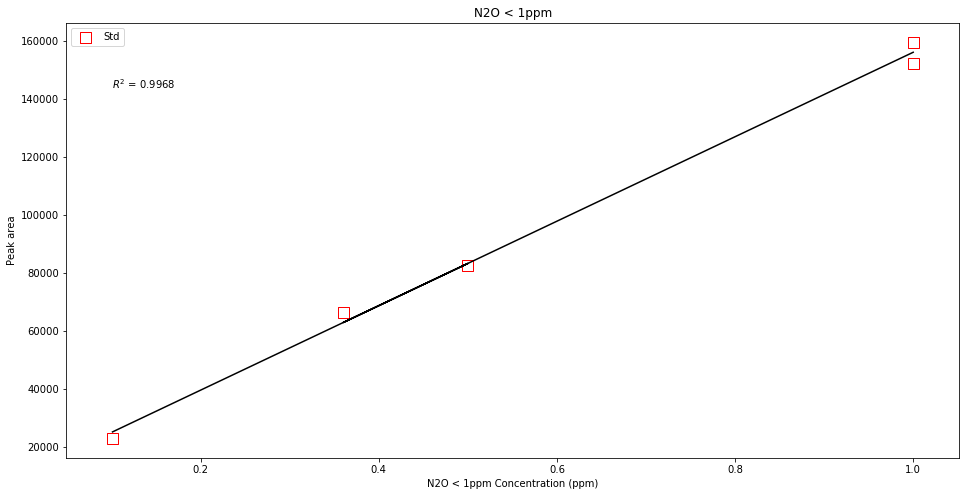

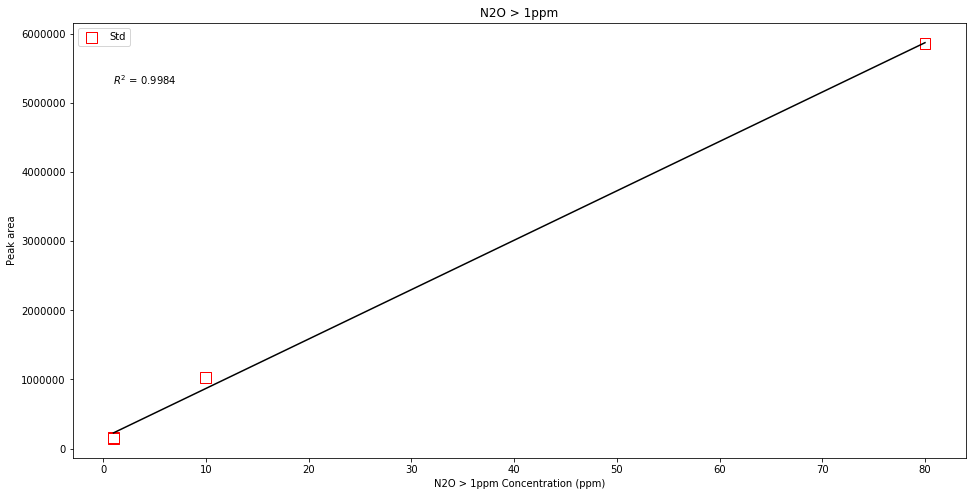

In [3]:
# Create separate groups of N2O standards and samples for greater than and less than 1 ppm
N2Ostdlt1 = N2Ostd[N2Ostd['N2O_conc'].astype(float) < 1.1]
N2Ostdgt1 = N2Ostd[N2Ostd['N2O_conc'].astype(float) > 0.9]
N2Ostdlt1_x = N2Ostdlt1.loc[:,"N2O_conc"].astype(float)
N2Ostdlt1_y = N2Ostdlt1.loc[:,"N2O_peak"].astype(float)
N2Ostdgt1_x = N2Ostdgt1.loc[:,"N2O_conc"].astype(float)
N2Ostdgt1_y = N2Ostdgt1.loc[:,"N2O_peak"].astype(float)

N2Osamlt1 = N2Osam[N2Osam < 160000]
N2Osamgt1 = N2Osam[N2Osam > 150000]
plot_standards(N2Ostdlt1_x, N2Ostdlt1_y, "N2O < 1ppm")
plot_standards(N2Ostdgt1_x, N2Ostdgt1_y, "N2O > 1ppm")

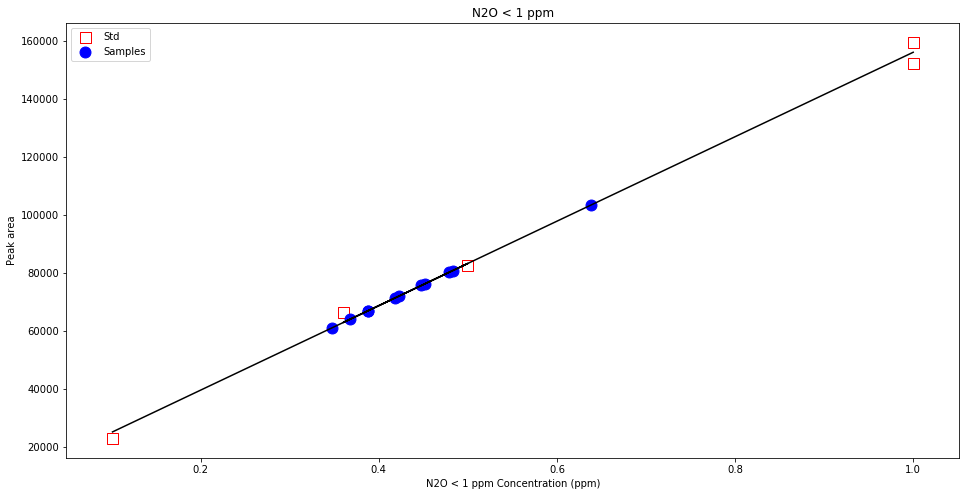

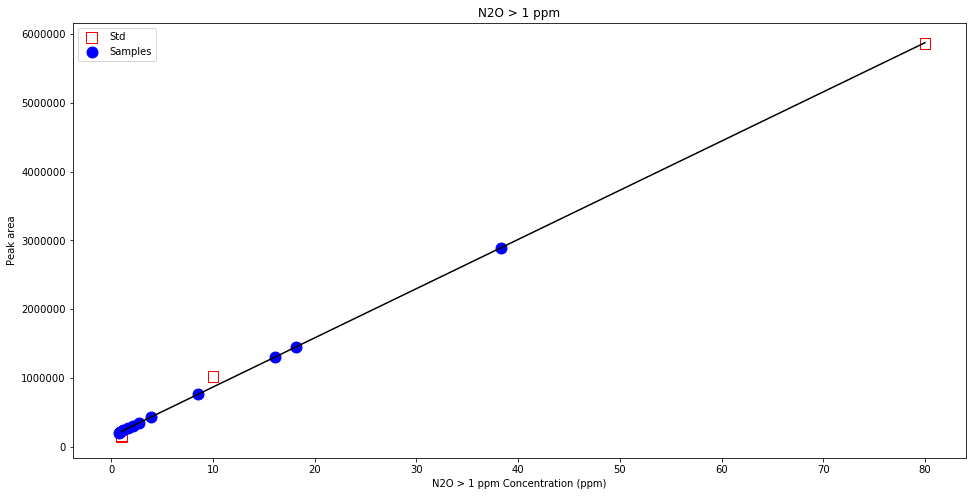

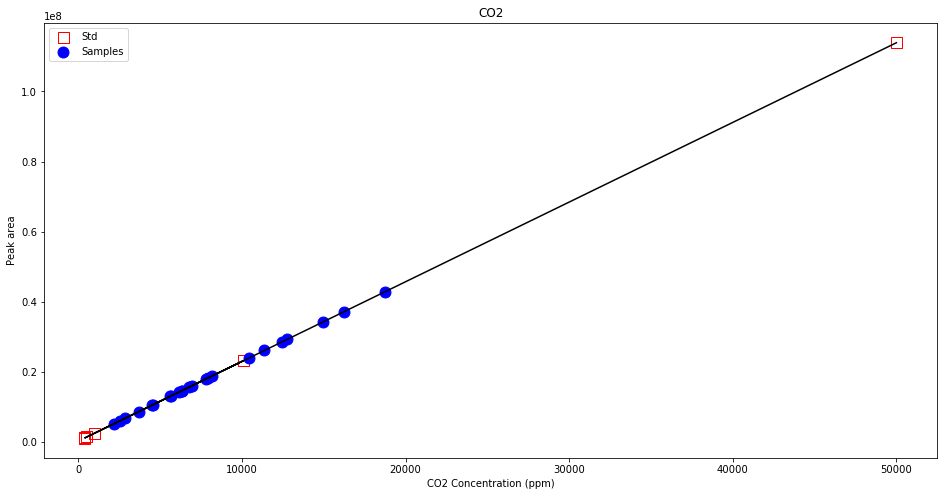

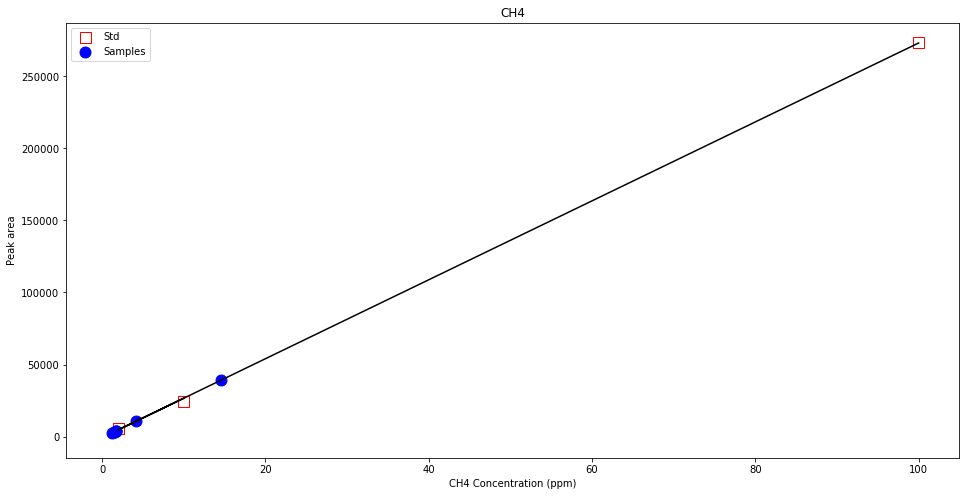

In [4]:
# Now, plot the standards along with the samples
plot_samples(N2Osamlt1, N2Ostdlt1_x, N2Ostdlt1_y, "N2O < 1 ppm")
plot_samples(N2Osamgt1, N2Ostdgt1_x, N2Ostdgt1_y, "N2O > 1 ppm")
plot_samples(CO2sam, CO2std_x, CO2std_y, "CO2")
plot_samples(CH4sam, CH4std_x, CH4std_y, "CH4")

In [5]:
# Since the data look good, export the sample concentrations to a text file
samlt1 = samples[samples['N2O_peak'].astype(float) < 160000]
samgt1 = samples[samples['N2O_peak'].astype(float) > 150000]

# Use separate N2O standard curves depending on the concentration
saveoutput1 = save_sampleconc(N2Ostdlt1_x, N2Ostdlt1_y, CO2std_x, CO2std_y, 
                              CH4std_x, CH4std_y, samlt1,
                              "../processed_data/RVT_TracerTest_GasConcentrations.txt", 
                              write_to_datafile=False)

saveoutput2 = save_sampleconc(N2Ostdgt1_x, N2Ostdgt1_y, CO2std_x, CO2std_y, 
                              CH4std_x, CH4std_y, samgt1,
                              "../processed_data/RVT_TracerTest_GasConcentrations.txt", 
                              write_to_datafile=False)

print(saveoutput1)
print(saveoutput2)
saveoutput1.to_csv("../processed_data/RVT_TracerTest_GasConcentrations_20181213.txt", mode='w', sep="\t", index=False, header=False, na_rep='NaN')
saveoutput2.to_csv("../processed_data/RVT_TracerTest_GasConcentrations_20181213.txt", mode='a', sep="\t", index=False, header=False, na_rep='NaN')

    vial location  depth       date method    dup  N2O_conc  N2O_bdl  \
25     0     NTT0   30.0 2018-10-24      G  False  0.347499    False   
26     0     NTT0   60.0 2018-10-24      G  False  0.388030    False   
28     0     NTT1   30.0 2018-10-24      G  False  0.387645    False   
29     0     NTT1   60.0 2018-10-24      G  False  0.417829    False   
30     0     NTT1   90.0 2018-10-24      G  False  0.447897    False   
31     0     NTT1  120.0 2018-10-24      G  False  0.478527    False   
32     0     NTC1   20.0 2018-10-24      G  False  0.367349    False   
33     0     NTC1   50.0 2018-10-24      G  False  0.422715    False   
34     0     NTC1   80.0 2018-10-24      G  False  0.637720    False   
35     0     NTC1  110.0 2018-10-24      G  False  0.451868    False   
36     0     NTC1  140.0 2018-10-24      G  False  0.482760    False   

        CO2_conc  CO2_bdl   CH4_conc  CH4_bdl  
25   2178.728314    False   4.171835    False  
26   4516.797709    False  14.542307   